In [38]:
#type:ignore
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
import contractions
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split


In [39]:
df=pd.read_csv('train.tsv',sep='\t')

In [40]:
df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [42]:
df.isna().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [43]:
df['Sentiment'].value_counts()/len(df['Sentiment'])


Sentiment
2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: count, dtype: float64

C:\Users\FATTANI COMPUTERS\AppData\Local\Temp\ipykernel_12848\2689743136.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['Sentiment'].value_counts()/len(df['Sentiment']),palette='Set2')


<Axes: xlabel='Sentiment', ylabel='count'>

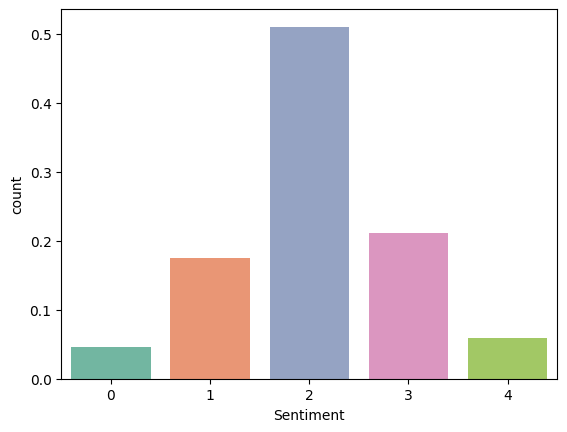

In [44]:
sns.barplot(df['Sentiment'].value_counts()/len(df['Sentiment']),palette='Set2')

In [45]:
df[df['Sentiment']==2].sample(10)

,PhraseId,SentenceId,Phrase,Sentiment
29927,29928,1387,an hour and a half,2
8658,8659,360,bypass a hip-hop documentary,2
58078,58079,2927,"With jump cuts , fast editing and lots of pyro...",2
58465,58466,2946,abbreviated,2
97346,97347,5091,the evidence,2
106934,106935,5646,on the cheap,2
129496,129497,6963,parallel and defiant aesthetic,2
53059,53060,2632,radar,2
137640,137641,7446,mad queens,2
78030,78031,4017,"to watch Huppert scheming , with her small , i...",2


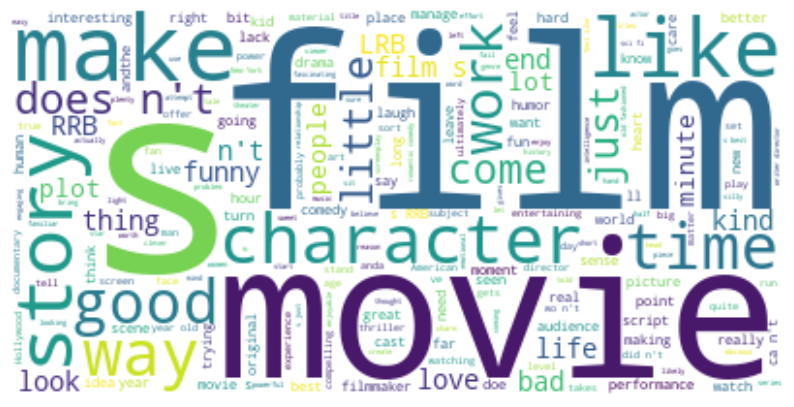

In [46]:
from wordcloud import WordCloud

my_cloud = WordCloud(background_color='white',stopwords =ENGLISH_STOP_WORDS).generate("".join(df['Phrase']))


plt.figure(figsize=(10,20))
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
plt.show()

In [47]:
# import os

# # Specify the directory you want to use
# nltk_data_dir = 'D:\project3.1\env\Lib'

# # Add this directory to NLTK data path
# nltk.data.path.append(nltk_data_dir)

# # Download the punkt tokenizer into the specified directory
# nltk.download('punkt', download_dir=nltk_data_dir)
# nltk.download('punkt_tab', download_dir=nltk_data_dir)
# nltk.download('stopwords',download_dir=nltk_data_dir)



In [48]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to C:\Users\FATTANI
[nltk_data]     COMPUTERS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [49]:
# def data_preprocessing(text):
#     tokens=[word_tokenize(word.lower()) for word in token ]
#     tokens=[word for word in token if word.isalpha()]
#     tokens=[word for word in token if word not in stopwords.words('english')]
#     return ''.join(tokens)

# df['tokens']=df['Phrase'].apply(data_preprocessing)
    
    

In [50]:
df['Phrase'].unique()

array(['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
       'A series of escapades demonstrating the adage that what is good for the goose',
       'A series', ..., 'avuncular chortles', 'avuncular', 'chortles'],
      dtype=object)

In [51]:
# for index,text in enumerate(df['Phrase']):
#       print('Review %d:\n'%(index+1),text)

clearly see that there is lot of punctuation and stem words

In [52]:
# def expand_contractions(text):
#     return contractions.fix(text)
# df['filtered']=df['Phrase'].apply(expand_contractions)


In [53]:
# def remove_punctuation(text):
#    return text.translate(str.maketrans("","",string.punctuation))
# df['filtered']=df['Phrase'].apply(remove_punctuation)


In [54]:
# for index,text in enumerate(df['filtered'][30:90]):
#       print('Review %d:\n'%(index+1),text)

In [55]:
# df['filtered']=df['Phrase'].apply(lambda x: re.sub(' +',' ',x))

In [56]:
# def text_lowercase(text):
#     return text.lower()
# df['filtered']=df['Phrase'].apply(text_lowercase)

In [57]:
# df = df[df['Phrase'].apply(lambda x: len(str(x))>= 3)]

In [58]:
# def text_filtered(text):
#     # if  text.strip()==" ":
#     #     return[]
#     tokens=[word_tokenize(word) for word in text if word not in stopwords.words('english')]
#     return tokens
# df['tokens']=df['Phrase'].apply(text_filtered)

In [59]:
df['filtered']=df['Phrase']

In [60]:
tokens=[word_tokenize(token.lower()) for token in df['filtered']]

In [61]:
tokens

[['a',
  'series',
  'of',
  'escapades',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose',
  'is',
  'also',
  'good',
  'for',
  'the',
  'gander',
  ',',
  'some',
  'of',
  'which',
  'occasionally',
  'amuses',
  'but',
  'none',
  'of',
  'which',
  'amounts',
  'to',
  'much',
  'of',
  'a',
  'story',
  '.'],
 ['a',
  'series',
  'of',
  'escapades',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['a', 'series'],
 ['a'],
 ['series'],
 ['of',
  'escapades',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['of'],
 ['escapades',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['escapades'],
 ['demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['demonstrating', 'the', 'adage'],
 ['demonstrating'

In [62]:

# list=[]
# for token in tokens:
#     # if token.strip()==" ":
#     #     continue
#     if not token in ENGLISH_STOP_WORDS:
#         # list.append(token)
#         print(token)

In [63]:
# nltk.download('wordnet')

In [64]:
WNlemmatize=WordNetLemmatizer()
word_lemmatize=[[WNlemmatize.lemmatize(word) for word in token] for token in tokens]

In [65]:
word_lemmatize

[['a',
  'series',
  'of',
  'escapade',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose',
  'is',
  'also',
  'good',
  'for',
  'the',
  'gander',
  ',',
  'some',
  'of',
  'which',
  'occasionally',
  'amuses',
  'but',
  'none',
  'of',
  'which',
  'amount',
  'to',
  'much',
  'of',
  'a',
  'story',
  '.'],
 ['a',
  'series',
  'of',
  'escapade',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['a', 'series'],
 ['a'],
 ['series'],
 ['of',
  'escapade',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['of'],
 ['escapade',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['escapade'],
 ['demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['demonstrating', 'the', 'adage'],
 ['demonstrating'],
 ['

In [66]:
df['word_lemmatize']=word_lemmatize

In [67]:
df['word_lemmatize']=df['word_lemmatize'].astype(str).fillna('').str.lower()

In [68]:
vect=TfidfVectorizer(stop_words=stopwords.words('english'), ngram_range=(1, 2), max_features=700, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(df['filtered'])



# X = vect.transform(df['filtered'])


X = vect.fit_transform(df['filtered']).toarray()
y = df['Sentiment'].values


In [69]:
df['word_lemmatize']

0         ['a', 'series', 'of', 'escapade', 'demonstrati...
1         ['a', 'series', 'of', 'escapade', 'demonstrati...
2                                           ['a', 'series']
3                                                     ['a']
4                                                ['series']
                                ...                        
156055                                     ['hearst', "'s"]
156056                   ['forced', 'avuncular', 'chortle']
156057                             ['avuncular', 'chortle']
156058                                        ['avuncular']
156059                                          ['chortle']
Name: word_lemmatize, Length: 156060, dtype: object

In [70]:
 
# X_lemmax = vect.transform(df['word_lemmatize'])
# Create a DataFrame
# reviews_transformed_t = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())
# print('Top 5 rows of the DataFrame: \n', reviews_transformed.head())

In [72]:
# Define X and y
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456)

# Train a logistic regression
log_reg = LogisticRegression(solver='saga', max_iter=200).fit(X_train, y_train)
# Predict the labels
y_predicted = log_reg.predict(X_test)

# Print accuracy score and confusion matrix on test set
accuracy=accuracy_score(y_test, y_predicted)
CM=confusion_matrix(y_test, y_predicted)/len(y_test)
precision = precision_score(y_test, y_predicted, average='weighted')
recall = recall_score(y_test, y_predicted, average='weighted')
f1 = f1_score(y_test, y_predicted, average='weighted')

In [74]:
# Print the evaluation results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.5676
Precision: 0.5401
Recall: 0.5676
F1-score: 0.5114


In [84]:
CM

array([[4.00486992e-03, 1.29437396e-02, 2.65923363e-02, 2.94758426e-03,
        2.24272716e-04],
       [2.81942842e-03, 3.24554658e-02, 1.27643214e-01, 1.34563629e-02,
        5.44662309e-04],
       [1.15340254e-03, 1.84864796e-02, 4.53191080e-01, 3.21671152e-02,
        8.33012944e-04],
       [4.48545431e-04, 6.60002563e-03, 1.29982058e-01, 6.84672562e-02,
        4.61361015e-03],
       [9.61168781e-05, 1.37767525e-03, 2.33884403e-02, 2.61117519e-02,
        9.45149302e-03]])

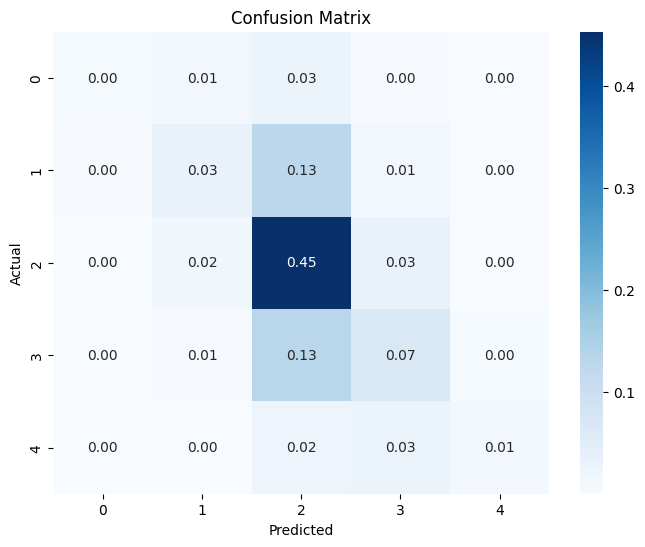

In [86]:
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, cmap='Blues', fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

AttributeError: Rectangle.set() got an unexpected keyword argument 'hoe'

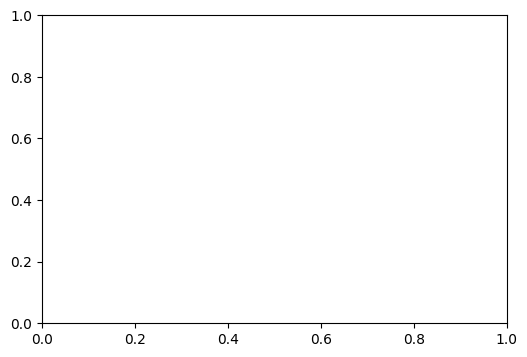

In [91]:
plt.figure(figsize=(6, 4))
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()